In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\demo_data\demo_data\6.overlap.csv",header=None)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
data.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [5]:
data.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [6]:
data.duplicated().sum()

12

In [7]:
data.shape

(100, 3)

C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

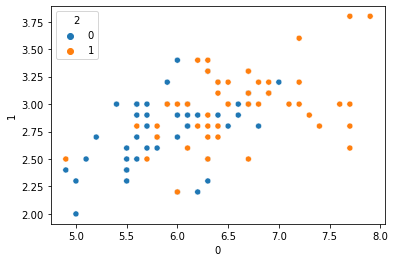

In [8]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[[0,1]],data[2],test_size=0.1,random_state=42)

In [10]:
X_train.shape,X_test.shape

((90, 2), (10, 2))

In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_tr = scale.fit_transform(X_train)
X_test_tr = scale.transform(X_test)

In [12]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [13]:
model = Sequential()

model.add(Dense(8,activation="relu",input_dim=2))
model.add(Dense(6,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 dropout (Dropout)           (None, 2)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 3

In [15]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [16]:
history = model.fit(X_train_tr,y_train,epochs=500,batch_size=12,validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 1s 37ms/step - loss: 0.6923 - accuracy: 0.5139 - val_loss: 0.6923 - val_accuracy: 0.4444
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.5556 - val_loss: 0.6916 - val_accuracy: 0.4444
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6877 - accuracy: 0.4861 - val_loss: 0.6909 - val_accuracy: 0.4444
Epoch 4/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6843 - accuracy: 0.5417 - val_loss: 0.6903 - val_accuracy: 0.4444
Epoch 5/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6868 - accuracy: 0.4722 - val_loss: 0.6896 - val_accuracy: 0.4444
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6859 - accuracy: 0.4028 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6798 - accuracy: 0.4861 - val_loss: 0.6881 - val_accuracy: 0.5556
Epoch 8/500
6/6 [=========

In [17]:
y_cap=model.predict(X_test_tr)

1/1 [==============================] - 0s 162ms/step


In [18]:
y_capf=np.where(y_cap>0.5,1,0)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.8

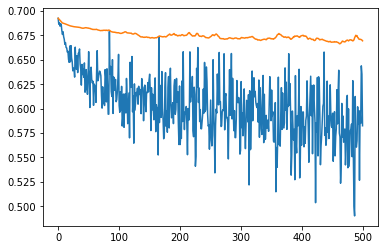

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [21]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 6s 2ms/step


C:\Users\HP\OneDrive\Documents\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

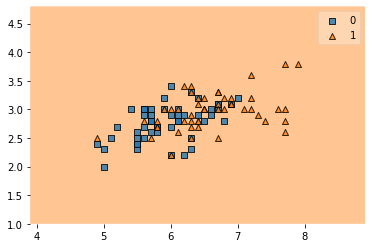

In [22]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

3888/3888 [==============================] - 6s 2ms/step


<AxesSubplot:>

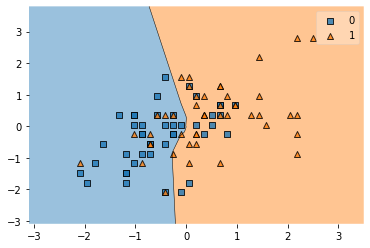

In [23]:
plot_decision_regions(X_train_tr,y_train.values.astype(int),clf=model)

3888/3888 [==============================] - 6s 2ms/step


<AxesSubplot:>

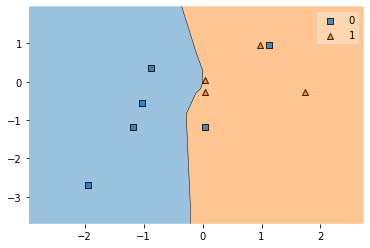

In [24]:
plot_decision_regions(X_test_tr,y_test.values.astype(int),clf=model)